In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
def pretty_data(data):
    try:
        result = int(data)
        return result
    except:
        try:
            result = float(data)
            return result
        except:
            try:
                result = int(data.replace('$', '').replace('€', '').replace('£', '').replace(' ', ''))
                return result
            except:
                result = data
                return result

             Название Название в оригинале   Год  Продолжительность    Страна  \
0         Оппенгеймер          Oppenheimer  2023                180       США   
1         Оставленные        The Holdovers  2023                133       США   
2   Бедные-несчастные          Poor Things  2023                141  Ирландия   
3       Прошлые жизни           Past Lives  2023                105       США   
4  Американское чтиво     American Fiction  2023                116       США   

        Жанр         Режиссер  Рейтинг  Бюджет($)  Сборы в США($)  \
0  биография  Кристофер Нолан        8  100000000       329862540   
1      драма   Александр Пэйн        7   24791639        20355375   
2      драма  Йоргос Лантимос        7   35000000        34553225   
3  мелодрама        Селин Сон        7   24791639        76374201   
4      драма  Корд Джефферсон        7   24791639        21098470   

   Сборы в мире($)    Прибыль  
0        972444774  872444774  
1         44644930   19853291  
2 

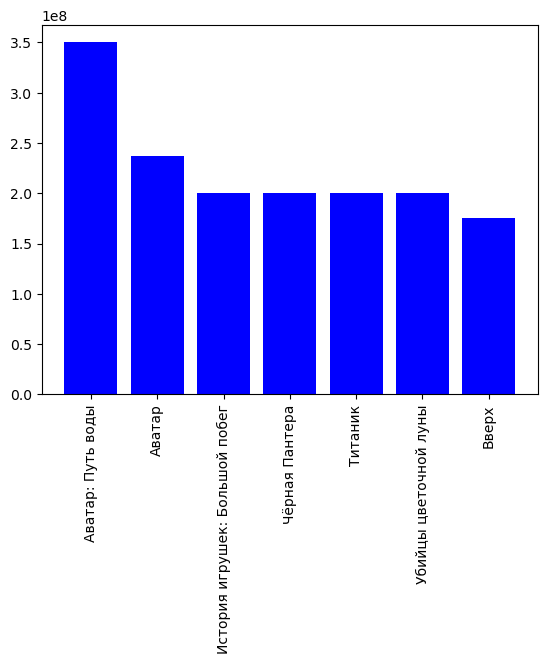

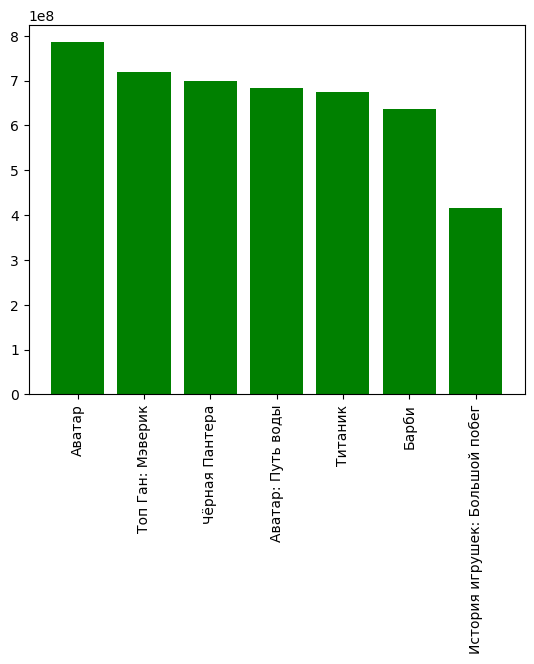

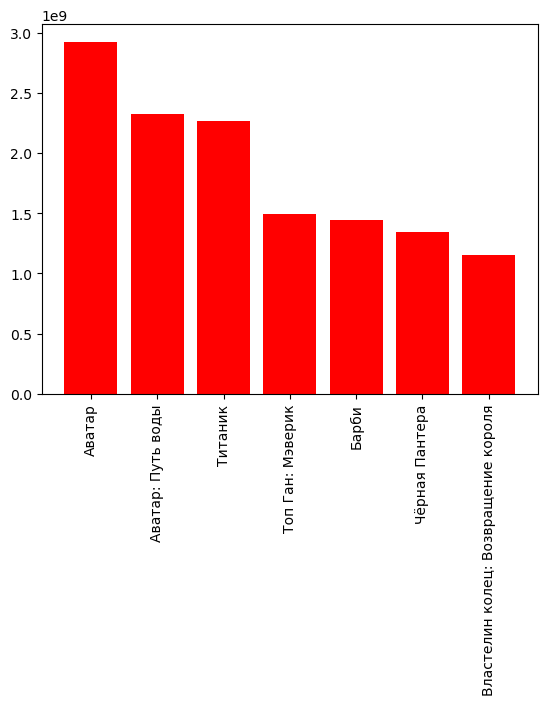

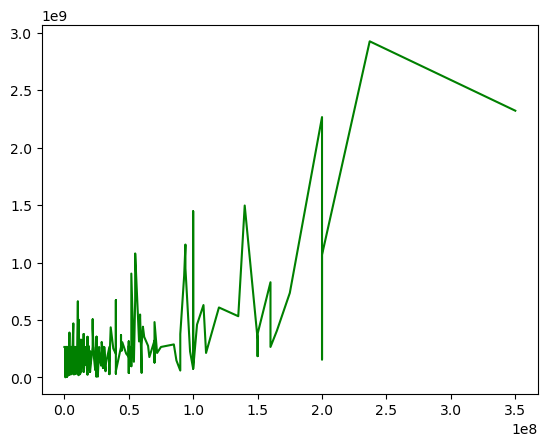

In [7]:

df = pd.read_csv('df_films_pages_1-13.csv')
df_budget = pd.read_csv('df_films_budget.csv')

df_merged = df.merge(df_budget, how='left', on='Название').drop('Ссылка', axis=1)

# df_merged.dropna(inplace=True)

df_merged = df_merged.map(pretty_data, na_action='ignore')
df_merged['Бюджет($)'].fillna(int(df_merged['Бюджет($)'].mean()), inplace=True)
df_merged['Сборы в США($)'].fillna(int(df_merged['Сборы в США($)'].mean()), inplace=True)
df_merged['Сборы в мире($)'].fillna(int(df_merged['Сборы в мире($)'].mean()), inplace=True)
df_merged['Прибыль'] = df_merged['Сборы в мире($)'] - df_merged['Бюджет($)']
df_merged = df_merged.map(pretty_data)

print(df_merged.head())

# with open('index_temp.html', 'w', encoding='utf-8') as f:
#     f.write(df_merged.to_html())

top_budget = df_merged.sort_values(by='Бюджет($)', ascending=False).head(7)
top_profit_usa = df_merged.sort_values(by='Сборы в США($)', ascending=False).head(7)
top_profit_world = df_merged.sort_values(by='Сборы в мире($)', ascending=False).head(7)

df_budget_profit = df_merged.sort_values(by='Бюджет($)')[['Бюджет($)', 'Сборы в мире($)']]

plt.xticks(rotation=90)
plt.bar(top_budget['Название'], top_budget['Бюджет($)'], color='b')
plt.show()
plt.xticks(rotation=90)
plt.bar(top_profit_usa['Название'], top_profit_usa['Сборы в США($)'], color='g')
plt.show()
plt.xticks(rotation=90)
plt.bar(top_profit_world['Название'], top_profit_world['Сборы в мире($)'], color='r')
plt.show()

plt.plot(df_budget_profit['Бюджет($)'], df_budget_profit['Сборы в мире($)'], color='g')
plt.show()

# print(int(df_merged['Прибыль'].mean()*100)) # средняя прибыль(?)

*Подписать оси, масштаб значений?*

